In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from pandas import DataFrame
from collections import Counter

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, MaxPooling2D, AveragePooling2D, Conv2D, Dropout, BatchNormalization, GlobalMaxPooling2D, Flatten

In [2]:
img_input = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (5, 5), padding='SAME', activation='relu')(img_input)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Flatten()(x)
# x=tf.keras.layers.Dense(128,activation='relu')(x)
# x=tf.keras.layers.Dense(1,activation='sigmoid')(x)

crowd_prediction = tf.keras.layers.Dense(1, activation='sigmoid', name='crowd')(x)
coeff_prediction = tf.keras.layers.Dense(1, name='coeff')(x)

model = tf.keras.Model(img_input, [crowd_prediction, coeff_prediction])

model.compile(optimizer='SGD',
              loss=['binary_crossentropy', 'mae'],
              metrics=['accuracy', 'mae'])

In [2]:
ann1 = pd.read_csv('./VisDrone2020-CC/annotations/00001.txt', names=['seq1','x','y'], skiprows=1,delimiter=',')
daftar = ann1.values.tolist()

In [3]:
import os

In [4]:
tempat = os.listdir('./VisDrone2020-CC/sequences/00001/')

In [5]:
def display_img(img,cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

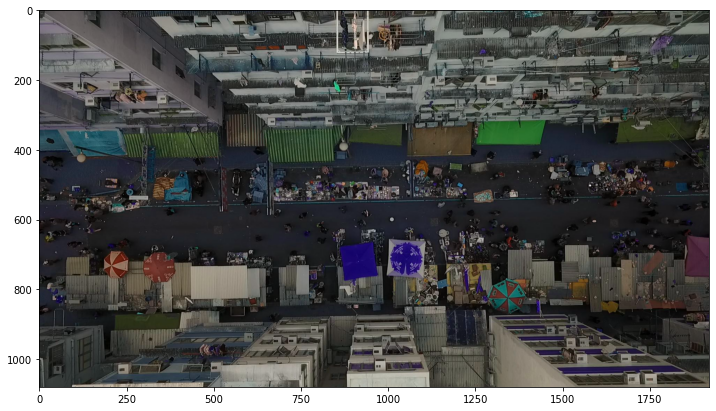

In [6]:
img = cv2.imread('VisDrone2020-CC/sequences/00001/00001.jpg')
display_img(img)

In [9]:
counter = 0
sedang = 0
juml=0

for i in daftar:
    if i[0] == counter+1:
        if counter>=1:
            nama='hasil/00001/'+nomer+'.jpg'
            cv2.imwrite(nama, img)
        counter+=1
    if i[0] == counter:
        if sedang+1 == counter:
            nomer = str(i[0]).zfill(5)
            PATH = ('VisDrone2020-CC/sequences/00001/' +nomer+ '.jpg')
            img = cv2.imread(PATH)
            sedang+=1
        if sedang == counter:
            cv2.circle(img, (i[1],i[2]), 5, (0,0,255), 4)
nama='hasil/00001/'+nomer+'.jpg'
cv2.imwrite(nama, img)
print(counter)

30


In [7]:
def jarak(point1,point2):
    dist = np.linalg.norm(point1 - point2)
    return(dist)

In [114]:
a = [[1, 2], [3, 4]]
a.append([5, 6])
a

[[1, 2], [3, 4], [5, 6]]

In [69]:
# from sklearn.datasets import make_blobs
# X,_ = make_blobs(n_samples=500, centers=3, n_features=2, random_state=20)
# df = DataFrame(dict(x=X[:,0], y=X[:,1]))
# fig, ax = plt.subplots(figsize=(8,8))
# df.plot(ax=ax, kind='scatter', x='x', y='y')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show

In [8]:
def show_cluster(data, cluster):
    df = DataFrame(dict(x=data[:,0], y=data[:,1], label=cluster))
#     colors = {-1: 'r', 0:'g', 1:'b', 2:'c', 3:'m', 4:'y', 5:'k', 6:'pink'}
    l=[]
    for i in range(0, len(data)+1):
        coba = np.random.choice(range(0, 255), size=3)
        coba = coba/255
        l.append(tuple(coba))
    fig, ax = plt.subplots(figsize=(8,8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=l[key])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc=(1.04,0))
    plt.gca().invert_yaxis()

In [9]:
ar=[]
for i in daftar:
    if i[0]==1:
        ar.append([i[1],i[2]])
ar = np.asarray(ar)

In [33]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=33, min_samples=4).fit(ar)
a = clustering.labels_

In [34]:
a

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,
        0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1], dtype=int64)

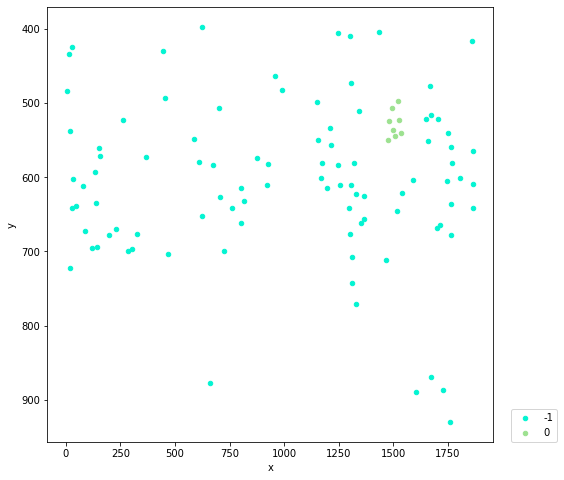

In [35]:
show_cluster(ar,a)

In [12]:
j = Counter(a)
cr=[]
for i in j:
    if j[i] > 9 and i != -1:
        cr.append(i)
# for i in cr:
# np.where(a==-1,99,a)
a

array([-1, -1,  0, -1,  1,  1, -1,  2, -1, -1,  3, -1,  1, -1,  1,  1,  4,
        1, -1,  5,  5,  6,  7,  8,  1,  3, -1,  8,  6, -1, -1,  1,  4,  9,
        9,  9, 10, 10, -1,  0,  4,  4,  4,  4,  4,  4,  4,  4,  1,  9,  9,
        9,  9,  9, -1, 11, 11, -1, 12, 12, 12, 11, 11, -1, 13, 13,  8,  8,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  4,  1, -1, -1, -1,  4,  4,  4,
        2,  2,  7,  7, -1, -1, 14, 14, 14, 14, -1, -1, -1, -1, -1, -1,  1,
       -1], dtype=int64)

In [39]:
# array1 = np.array([2, 2, 2, 0, 2, 0, 2])
# np.where(array1==0, 1, array1)
# print(array1)

In [32]:
ara=[1,2,3,1,3,2,1,1]
arb=[1,3]
for i in arb:
    ara = [0 if x!=i else x for x in ara]
    print(i,ara)

1 [1, 0, 0, 1, 0, 0, 1, 1]
3 [0, 0, 0, 0, 0, 0, 0, 0]


In [21]:
count=-1
for i in a:
    count+=1
    print(count)
#     print("pertama",i,count)
    for h in cr:
        print("dalem",i,h)
        if i != h:
            print("halo",a[count])
            a[count]=-1
            print("nah",a[count])
#             break
    count=-1
    print(a)

ini h 1
0
dalem -1 1
halo -1
nah -1
1
dalem -1 1
halo -1
nah -1
2
dalem 0 1
halo 0
nah -1
3
dalem -1 1
halo -1
nah -1
4
dalem 1 1
5
dalem 1 1
6
dalem -1 1
halo -1
nah -1
7
dalem 2 1
halo 2
nah -1
8
dalem -1 1
halo -1
nah -1
9
dalem -1 1
halo -1
nah -1
10
dalem 3 1
halo 3
nah -1
11
dalem -1 1
halo -1
nah -1
12
dalem 1 1
13
dalem -1 1
halo -1
nah -1
14
dalem 1 1
15
dalem 1 1
16
dalem 4 1
halo 4
nah -1
17
dalem 1 1
18
dalem -1 1
halo -1
nah -1
19
dalem 5 1
halo 5
nah -1
20
dalem 5 1
halo 5
nah -1
21
dalem 6 1
halo 6
nah -1
22
dalem 7 1
halo 7
nah -1
23
dalem 8 1
halo 8
nah -1
24
dalem 1 1
25
dalem 3 1
halo 3
nah -1
26
dalem -1 1
halo -1
nah -1
27
dalem 8 1
halo 8
nah -1
28
dalem 6 1
halo 6
nah -1
29
dalem -1 1
halo -1
nah -1
30
dalem -1 1
halo -1
nah -1
31
dalem 1 1
32
dalem 4 1
halo 4
nah -1
33
dalem 9 1
halo 9
nah -1
34
dalem 9 1
halo 9
nah -1
35
dalem 9 1
halo 9
nah -1
36
dalem 10 1
halo 10
nah -1
37
dalem 10 1
halo 10
nah -1
38
dalem -1 1
halo -1
nah -1
39
dalem 0 1
halo 0
nah -1
40
d

103


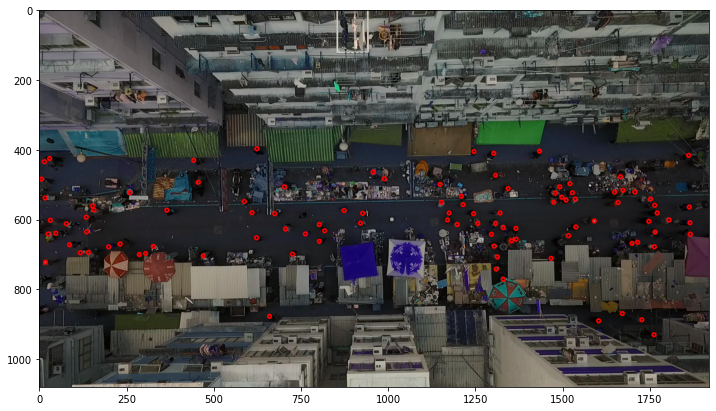

In [89]:
counter = 0

# nomer = str(i[0]).zfill(5)
# PATH = ('VisDrone2020-CC/sequences/00001/' +nomer+ '.jpg')
# img = cv2.imread(PATH)
img = cv2.imread('VisDrone2020-CC/sequences/00001/00001.jpg')

for i in daftar:
    if i[0] == 1:
        counter+=1
        cv2.circle(img, (i[1],i[2]), 5, (255,0,0), 4)
        
#     print(PATH)
# print(counter)
print(counter)
display_img(img)